# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [6]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 438,seed: 372
Step 0: Loss = 4.8396092985905543, performing 98.5 it/sec
Step 100: Loss = 0.0136124939475609, performing 170.2 it/sec
No improvement since Step 122, early stopping.
[Best]  Step 121: Loss = 0.0041784477743988
[Final] Step 171: Loss = 0.0058082823573179

predicted end states
------------------------------------
         5th       Mean      95th
LONP-1  1.00e-01  1.00e-01  1.00e-01
LONP-2  8.27e-10  8.42e-10  8.58e-10
LONP-3  3.31e-09  3.33e-09  3.34e-09
LONP-4  4.43e-07  4.43e-07  4.43e-07
LONP-5  1.75e-08  1.75e-08  1.75e-08


predicted conditional events
----------------------------------
       5th       Mean      95th
LONP  1.00e+00  1.00e+00  1.00e+00
FSIG  1.75e-07  1.75e-07  1.75e-07
FROD  4.43e-06  4.43e-06  4.43e-06
DHRS  3.31e-08  3.33e-08  3.34e-08
DHRL  8.27e-09  8.42e-09  8.58e-09




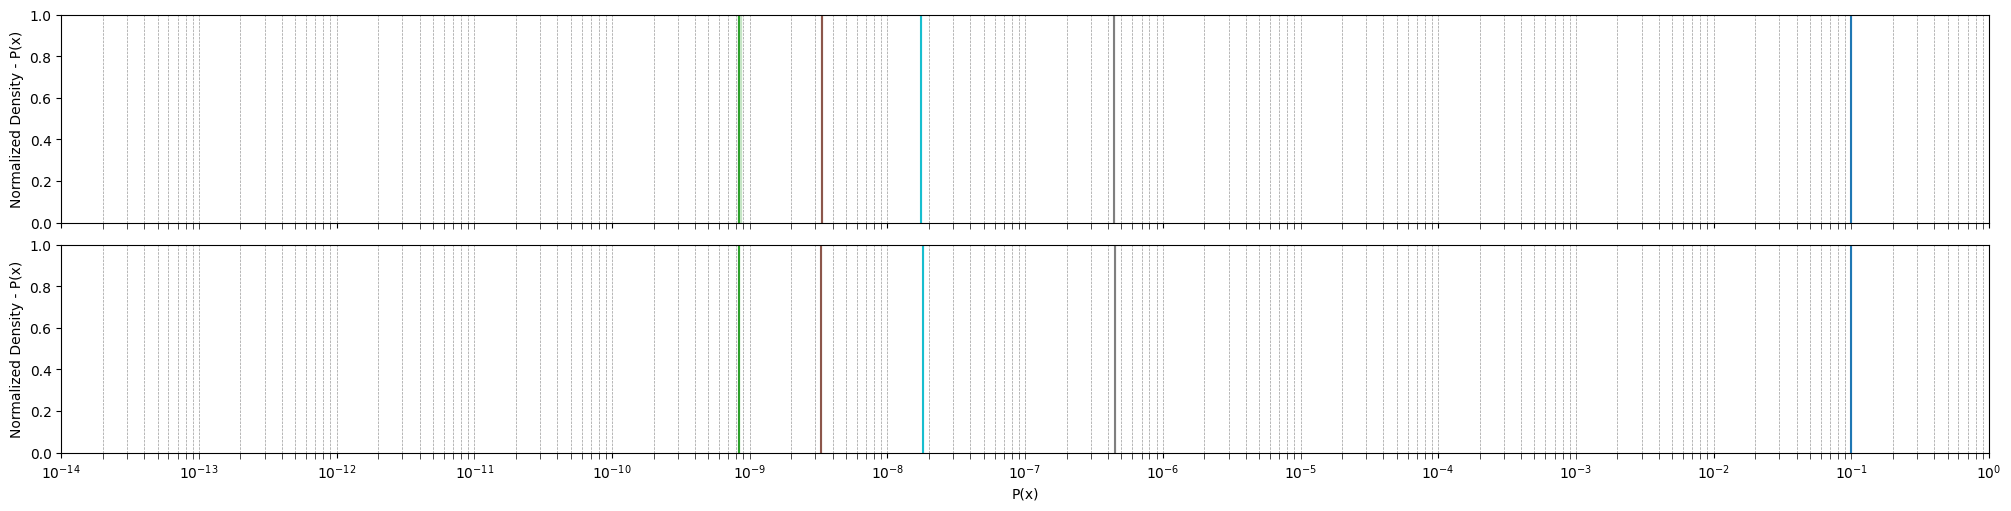

In [7]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 438,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LONP', 'FSIG', 'FROD', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'LONP-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 1e-1 - 8.4e-10 - 3.3e-9 - 4.5e-7 - 1.8e-8
    # },
    'LONP-1': {
        'sequence': [1, 0, 0, 0, 0],
        'probability': 1e-1,
    },
    'LONP-2': {
        'sequence': [1, 0, 0, 0, 1],
        'probability': 8.4e-10,
    },
    'LONP-3': {
        'sequence': [1, 0, 0, 1, np.nan],
        'probability': 3.3e-9,
    },

    'LONP-4': {
        'sequence': [1, 0, 1, np.nan, np.nan],
        'probability': 4.5e-7,
    },

    'LONP-5': {
        'sequence': [1, 1, np.nan, np.nan, np.nan],
        'probability': 1.8e-8,
    },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)